> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#here i used read_csv to load the data from the file i uploaded earlier 'tmdb-movies.csv'.
df_m = pd.read_csv('tmdb-movies.csv')
#here i show some info to see the types and if there are any missing values.
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> ### i can see we have many columns with missing value. i will investigate more to see what i can do about them.

> we have missing valuse in those columns : imdb_id , cast , homepage , director , tagline , keywords , overview , production_companies.

>### i don't think i will need those columns so i will drop them.

In [3]:
df_m[df_m['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


>### i will only drop the rows with missing valuses cause i need this column.
>### And also i will make it a list instid of this string sperated by '|' .

In [4]:
#here i check for duplicated rows
df_m[df_m.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> ### I found one duplicated row , which is the row with the id 42194.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
#first i will drop the duplicated row.
df_m.drop_duplicates(inplace = True)

In [6]:
#now i will drop the columns that i don't want or have missing values i decided to drop earlier.
df_m.drop(['id','imdb_id' , 'cast' , 'homepage' , 'director' , 'tagline','keywords','overview', 'production_companies'], axis=1,inplace=True)

In [7]:
#now i will drop the rows that has missing values in genres.
df_m.dropna(inplace=True)

In [8]:
#i will make sure that i cleaned it.
df_m.info()
print(df_m.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB
0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What is the most common genre from the year 1990 to 2000 ? 

In [9]:
#first i wanna make a copy of the data set.
df_90_2000 = df_m.copy()
#here i will use query to only have movies between 1990 and 2000.
df_90_2000 = df_90_2000.query('release_year >= 1990 & release_year <= 2000')
#here i will seperate the genres column.
df_90_2000['genres'] = df_90_2000['genres'].str.split("|")

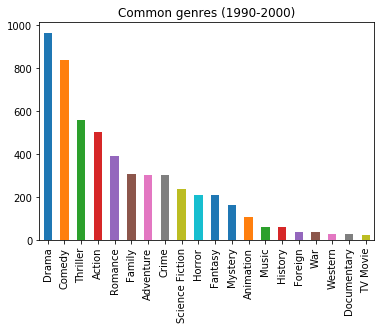

In [24]:
#creat temp df.
temp = pd.DataFrame()
#to put all the lists in one list and store it in a column in temp df.
temp['geners'] = df_90_2000['genres'].sum()
#plot the genres in bars.
temp['geners'].value_counts().plot(kind='bar')
plt.title('Common genres (1990-2000)');

>### It's clear the the genre (Drama) is the most common genre in that period

### Is there is any association between release year and budget ?

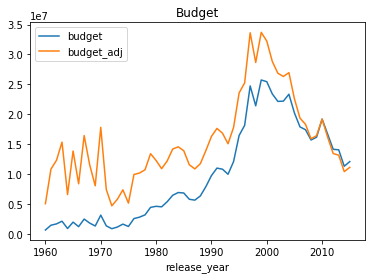

In [25]:
#i made a data frame to store the original df grouped by the release_year
#and took the mean of the columns 'budget' and 'budget_adj'.
df_budget = df_m.groupby('release_year')['budget','budget_adj'].mean()

#line plot
df_budget.plot(kind='line')
plt.title('Budget');

>### The budget's mean had been increasing untill about the year 2000
>### and then it started decreasing.

>## so there is no association between release year and budget. 

### What kinds of properties are associated with movies that have high vote average?


In [12]:
#first i wanna what is the 75% and the max.
df_m['vote_average'].describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [13]:
#here i wanna creat a new column with the levels of vote using the data we got earlier.
df_m['vote'] = pd.cut(df_m['vote_average'], [1.500000,5.400000,6.000000,6.600000,9.200000], labels=['Low','Medium','Moderately High','High'])
#check if it worked
df_m.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Moderately High
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Moderately High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High


In [14]:
#i will group by the vote level
df_m.groupby('vote').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
vote,,,,,,,,,
Low,0.421031,1.038003e+07,1.308234e+07,95.422623,67.773421,4.794344,2004.019431,1.232680e+07,1.570529e+07
Medium,0.555941,1.557749e+07,3.481590e+07,101.056433,144.632054,5.765463,2001.210685,1.827834e+07,4.218371e+07
Moderately High,0.706465,1.749837e+07,4.992210e+07,105.169715,236.990490,6.341990,1999.944038,2.109576e+07,6.371950e+07
High,0.934151,1.548405e+07,6.468755e+07,107.589634,441.906469,7.126617,1999.856976,1.905455e+07,8.828065e+07


In [38]:
#i will creat a function to write less lines of code.

def voteBar(par): 
 df_m.groupby('vote')[par].mean().plot(kind='bar')
 plt.ylabel(par)
 plt.title(par);
    

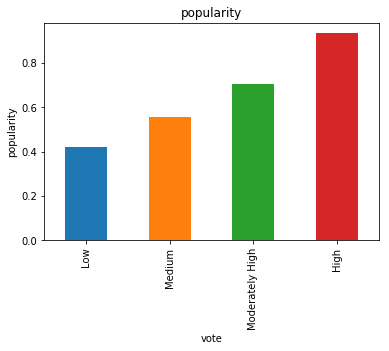

In [37]:
voteBar('popularity')

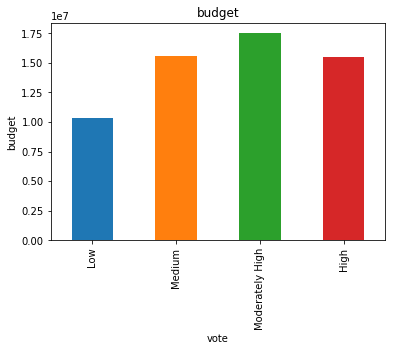

In [39]:
voteBar('budget')

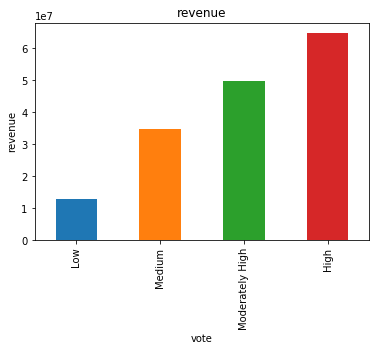

In [41]:
voteBar('revenue')

### They have high popularity.
### The budget mean is lower than the moderately high level budget mean.
### It has high revenue.

<a id='conclusions'></a>
## Conclusions

>## limitation :
>### - the way genres are stored (in a string sperated by '|') and not in a list.
>### - some columns has values as 0 like buget and revenue , i didn't know if that was a mistake or not.

> ## Q1-What is the most common genre from the year 1990 to 2000 ? :  
>### It's clear the the genre (Drama) is the most common genre in that period

> ## Q2-Is there is any association between release year and budget ? :
>### The budget's mean had been increasing untill about the year 2000 and then it started decreasing.
  >### so there is no association between release year and budget.
  
>## Q3-What kinds of properties are associated with movies that have high vote average? : 
>### They have high popularity.
>### The budget mean is lower than the moderately high level budget mean.
>### It has high revenue.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0